In [11]:
import numpy as np
import pandas as pd

In [12]:
#transfromed data is ready for analysis

df =  pd.read_csv("wearable_data.csv")
df.head()

,User_ID,Age,Gender,Weight,Height,Medical_Conditions,Medication,Smoker,Alcohol_Consumption,Timestamp,...,Ambient_Temperature,Battery_Level,Body_Fat_Percentage,Muscle_Mass,Altitude,UV_Exposure,Notifications_Received,Screen_Time,Health_Score,Anomaly_Flag
0,U_00001,61,Female,116.881827,146.140001,NaN,No,Yes,Moderate,2021-01-01 00:00:00,...,15.587789,4.395183,17.901052,47.032175,3241.914154,7.562890,52,1.814814,66.730939,1
1,U_00002,24,Other,146.140091,167.731242,NaN,No,No,Heavy,2021-01-01 01:00:00,...,18.730908,97.634516,15.572783,46.135678,3710.101830,3.033488,99,7.865145,22.346554,1
2,U_00003,81,Male,35.904063,170.920038,Hypertension,Yes,Yes,Moderate,2021-01-01 02:00:00,...,40.093158,1.080573,10.031448,38.153122,4960.072149,3.746323,98,7.173805,74.686736,0
3,U_00004,70,Male,107.167251,176.456448,Diabetes,No,No,NaN,2021-01-01 03:00:00,...,28.775765,76.683681,27.987767,37.370333,3463.382361,5.896902,6,7.755346,38.757816,0
4,U_00005,30,Male,91.480042,163.988038,NaN,No,Yes,Moderate,2021-01-01 04:00:00,...,38.895837,78.488377,23.087857,36.558111,2228.276786,2.961103,32,6.188529,37.236317,1


In [14]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Weight', 'Height', 'Medical_Conditions',
       'Medication', 'Smoker', 'Alcohol_Consumption', 'Timestamp',
       'Day_of_Week', 'Sleep_Duration', 'Deep_Sleep_Duration',
       'REM_Sleep_Duration', 'Wakeups', 'Snoring', 'Heart_Rate',
       'Blood_Oxygen_Level', 'ECG', 'Steps', 'Calories_Burned',
       'Distance_Covered', 'Exercise_Type', 'Exercise_Duration',
       'Exercise_Intensity', 'Calories_Intake', 'Water_Intake', 'Stress_Level',
       'Mood', 'Skin_Temperature', 'Ambient_Temperature', 'Battery_Level',
       'Body_Fat_Percentage', 'Muscle_Mass', 'Altitude', 'UV_Exposure',
       'Notifications_Received', 'Screen_Time', 'Health_Score',
       'Anomaly_Flag'],
      dtype='object')

In [15]:
# Features to retain
features_to_retain = ['Age', 'Gender', 'Weight', 'Height', 'Medical_Conditions', 'Medication', 'Smoker', 'Alcohol_Consumption', 
                      'Sleep_Duration', 'Deep_Sleep_Duration', 'REM_Sleep_Duration', 'Wakeups', 'Snoring', 'Heart_Rate', 
                      'Blood_Oxygen_Level', 'Steps', 'Calories_Burned', 'Distance_Covered', 'Exercise_Type', 
                      'Exercise_Duration', 'Exercise_Intensity', 'Calories_Intake', 'Water_Intake', 'Stress_Level', 
                      'Mood', 'Skin_Temperature', 'Body_Fat_Percentage', 'Muscle_Mass', 'UV_Exposure', 'Health_Score']

# Retaining the necessary features
df = df[features_to_retain]

# Now, df contains only the features you wanted to retain
print(df.head())


   Age  Gender      Weight      Height Medical_Conditions Medication Smoker  \
0   61  Female  116.881827  146.140001                NaN         No    Yes   
1   24   Other  146.140091  167.731242                NaN         No     No   
2   81    Male   35.904063  170.920038       Hypertension        Yes    Yes   
3   70    Male  107.167251  176.456448           Diabetes         No     No   
4   30    Male   91.480042  163.988038                NaN         No    Yes   

  Alcohol_Consumption  Sleep_Duration  Deep_Sleep_Duration  ...  \
0            Moderate        8.289341             1.592234  ...   
1               Heavy        4.484992             1.030423  ...   
2            Moderate        6.702545             4.130870  ...   
3                 NaN        4.141764             2.439865  ...   
4            Moderate        4.950772             4.105686  ...   

   Exercise_Intensity  Calories_Intake Water_Intake  Stress_Level     Mood  \
0                 Low      1502.196342     3

In [21]:
print(df.isnull().sum())


Age                    0
Gender                 0
Weight                 0
Height                 0
Medical_Conditions     0
Medication             0
Smoker                 0
Alcohol_Consumption    0
Sleep_Duration         0
Deep_Sleep_Duration    0
REM_Sleep_Duration     0
Wakeups                0
Snoring                0
Heart_Rate             0
Blood_Oxygen_Level     0
Steps                  0
Calories_Burned        0
Distance_Covered       0
Exercise_Type          0
Exercise_Duration      0
Exercise_Intensity     0
Calories_Intake        0
Water_Intake           0
Stress_Level           0
Mood                   0
Skin_Temperature       0
Body_Fat_Percentage    0
Muscle_Mass            0
UV_Exposure            0
Health_Score           0
dtype: int64


In [17]:
df.shape

(100000, 30)

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Fill missing values
for feature in numerical_features:
    df[feature].fillna(df[feature].median(), inplace=True)

for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

# Normalize data
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [20]:
df.shape

(100000, 30)

In [22]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# One-hot Encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [23]:
print(df[numerical_features].mean())
print("\n")
print(df[numerical_features].std())


Age                   -1.161027e-16
Weight                -2.718537e-16
Height                -6.142642e-17
Sleep_Duration         2.387424e-16
Deep_Sleep_Duration   -1.606537e-16
REM_Sleep_Duration     2.245315e-16
Wakeups                2.067679e-17
Heart_Rate            -2.273737e-18
Blood_Oxygen_Level    -1.563194e-17
Steps                  3.012701e-16
Calories_Burned        3.269207e-16
Distance_Covered       2.448530e-16
Exercise_Duration     -1.243450e-16
Calories_Intake        9.649170e-17
Water_Intake          -4.443024e-16
Skin_Temperature       5.286438e-17
Body_Fat_Percentage   -1.827516e-16
Muscle_Mass           -1.756817e-16
UV_Exposure           -1.102762e-16
Health_Score          -4.156675e-17
dtype: float64


Age                    1.000005
Weight                 1.000005
Height                 1.000005
Sleep_Duration         1.000005
Deep_Sleep_Duration    1.000005
REM_Sleep_Duration     1.000005
Wakeups                1.000005
Heart_Rate             1.000005
Blood_O

In [24]:
print(df.columns)


Index(['Age', 'Weight', 'Height', 'Sleep_Duration', 'Deep_Sleep_Duration',
       'REM_Sleep_Duration', 'Wakeups', 'Heart_Rate', 'Blood_Oxygen_Level',
       'Steps', 'Calories_Burned', 'Distance_Covered', 'Exercise_Duration',
       'Calories_Intake', 'Water_Intake', 'Skin_Temperature',
       'Body_Fat_Percentage', 'Muscle_Mass', 'UV_Exposure', 'Health_Score',
       'Gender_Male', 'Gender_Other', 'Medical_Conditions_Hypertension',
       'Medication_Yes', 'Smoker_Yes', 'Alcohol_Consumption_Moderate',
       'Snoring_Yes', 'Exercise_Type_Strength Training', 'Exercise_Type_Yoga',
       'Exercise_Intensity_Low', 'Exercise_Intensity_Moderate',
       'Stress_Level_Low', 'Stress_Level_Moderate', 'Mood_Happy',
       'Mood_Neutral', 'Mood_Sad'],
      dtype='object')


In [25]:
# Taking one of the new one-hot encoded columns as an example
print(df['Gender_Male'].unique())  # Assuming 'Male' is one of the categories for the 'Gender' column.


[False  True]


In [26]:
for column in categorical_features:
    if column in df.columns:
        print(f"{column} still exists!")
    else:
        print(f"{column} has been one-hot encoded!")


Gender has been one-hot encoded!
Medical_Conditions has been one-hot encoded!
Medication has been one-hot encoded!
Smoker has been one-hot encoded!
Alcohol_Consumption has been one-hot encoded!
Snoring has been one-hot encoded!
Exercise_Type has been one-hot encoded!
Exercise_Intensity has been one-hot encoded!
Stress_Level has been one-hot encoded!
Mood has been one-hot encoded!


C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

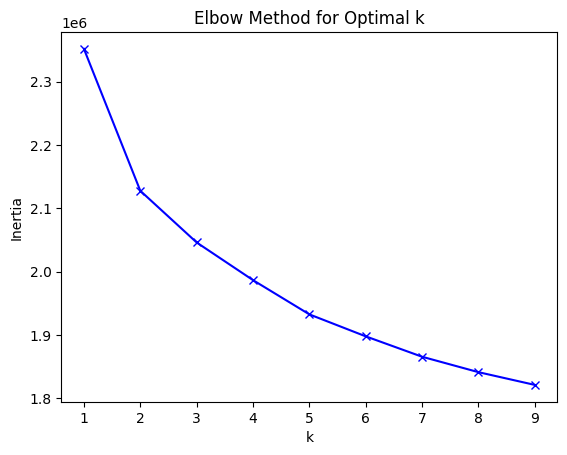

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine k using Elbow method
inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range_values, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [49]:
# Using the optimal k from the elbow plot
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df)
df['Cluster'] = clusters


C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [132]:
df_selected.head()

,Age,Weight,Height,Sleep_Duration,Calories_Intake
0,0.624661,0.752439,-1.385560,0.745263,-1.147608
1,-1.062932,1.589143,-0.157676,-1.451947,1.616536
2,1.536873,-1.563299,0.023669,-0.171194,0.505582
3,1.035156,0.474629,0.338523,-1.650179,0.619158
4,-0.789269,0.026019,-0.370550,-1.182935,-1.257477


In [50]:
from sklearn.cluster import KMeans

# Assuming your data after preprocessing is in a DataFrame named 'data'
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df)


C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
cluster_summary = df.groupby('cluster').mean()

              Age    Weight    Height  Sleep_Duration  Deep_Sleep_Duration  \
cluster                                                                      
0        0.001873 -0.002076  0.001135       -0.348692            -0.149652   
1       -0.009129 -0.011276  0.003987        0.350927             0.112317   
2        0.004532  0.008370 -0.003213        0.000553             0.024209   

         REM_Sleep_Duration   Wakeups  Heart_Rate  Blood_Oxygen_Level  \
cluster                                                                 
0                 -0.134914  0.007928    0.001711           -0.781556   
1                  0.174020 -0.013586   -0.006498            0.797612   
2                 -0.023724  0.003498    0.002987           -0.005675   

            Steps  ...  Exercise_Type_Strength Training  Exercise_Type_Yoga  \
cluster            ...                                                        
0        0.761673  ...                         0.228196            0.534816   
1     

In [121]:
df_selected.columns

Index(['Age', 'Weight', 'Height', 'Sleep_Duration', 'Calories_Intake'], dtype='object')

In [56]:

# 2. Clustering:

# Let's take 5 clusters as an example; you can modify this number
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df)
df['Cluster'] = clusters

# 3. Analyze Clusters:

cluster_summary = df.groupby('Cluster').mean()

# Assuming you want to compare against general population mean
general_population_mean = df.mean()

# 4. Provide Recommendations:

for cluster_num in cluster_summary.index:
    print(f"Recommendations for Cluster {cluster_num}:")
    
    # Sleep Recommendations:
    if cluster_summary.loc[cluster_num, 'Sleep_Duration'] < general_population_mean['Sleep_Duration']:
        print("- Consider increasing your sleep duration for better health.")
    elif cluster_summary.loc[cluster_num, 'Sleep_Duration'] > general_population_mean['Sleep_Duration'] + 3:
        print("- You might be oversleeping. Consider consulting a specialist.")
    
    # Activity Recommendations:
    if cluster_summary.loc[cluster_num, 'Steps'] < general_population_mean['Steps']:
        print("- Aim for more steps each day for better cardiovascular health.")
    
    # Nutrition Recommendations:
    if cluster_summary.loc[cluster_num, 'Water_Intake'] < general_population_mean['Water_Intake']:
        print("- Increase your daily water intake.")
    
   
    # ... other code ...

    # Exercise Recommendations:
    if cluster_summary.loc[cluster_num, 'Exercise_Duration'] < 30:
        print("- Aim for at least 30 minutes of exercise daily.")
    
    if 'Exercise_Type' in cluster_summary.columns:
        if pd.isnull(cluster_summary.loc[cluster_num, 'Exercise_Type']):
            print("- Incorporate varied exercise routines for comprehensive fitness, such as strength training or aerobics.")


    # Stress Recommendations:
    if 'Stress_Level' in cluster_summary.columns:
        if cluster_summary.loc[cluster_num, 'Stress_Level'] > 7:
            print("- Your stress levels are high. Consider relaxation techniques like meditation or seek counseling.")
    
    # Calorie Intake Recommendations:
    if cluster_summary.loc[cluster_num, 'Calories_Intake'] > 2500:
        print("- Monitor your calorie intake. Consider a balanced diet.")
    elif cluster_summary.loc[cluster_num, 'Calories_Intake'] < 1800:
        print("- Your calorie intake seems low. Make sure you're getting enough nutrients.")
    
    # Heart Rate Recommendations:
    if cluster_summary.loc[cluster_num, 'Heart_Rate'] > 90:
        print("- Your resting heart rate is on the higher side. Regular check-ups and monitoring are recommended.")
    
    # Blood Pressure Recommendations (if available):
    # Assuming 'Blood_Pressure' is represented as 'Systolic/Diastolic' in your dataset
    if 'Blood_Pressure' in cluster_summary.columns:
        systolic, diastolic = map(int, cluster_summary.loc[cluster_num, 'Blood_Pressure'].split('/'))
        if systolic > 140 or diastolic > 90:
            print("- Your blood pressure is high. Regular monitoring and medical advice are essential.")
        elif systolic < 90 or diastolic < 60:
            print("- Your blood pressure is on the lower side. Regular monitoring is recommended.")
    
    print("\n")


    print("\n")
for cluster_num in cluster_summary.index:
    print(f"Recommendations for Cluster {cluster_num}:")
    
    # Sleep Recommendations
    if cluster_summary.loc[cluster_num, 'Sleep_Duration'] < 6:
        print("- Consider increasing your sleep duration for better health.")
    elif cluster_summary.loc[cluster_num, 'Sleep_Duration'] > 9:
        print("- You might be oversleeping. Consider consulting a specialist.")
    
    # Activity Recommendations
    if cluster_summary.loc[cluster_num, 'Calories_Burned'] < 1500:
        print("- Your daily calorie burn is low. Consider incorporating more physical activities.")
    if cluster_summary.loc[cluster_num, 'Steps'] < 5000:
        print("- Aim for at least 10,000 steps a day for improved cardiovascular health.")
    
    # Health Monitoring Recommendations
    if cluster_summary.loc[cluster_num, 'Heart_Rate'] > 90:
        print("- Your resting heart rate seems high. Monitor your heart health and consider regular check-ups.")
    if cluster_summary.loc[cluster_num, 'Blood_Oxygen_Level'] < 95:
        print("- Maintain a check on your oxygen levels. Consider consulting a doctor if it drops further.")
    
    # Nutrition and Hydration Recommendations
    if cluster_summary.loc[cluster_num, 'Calories_Intake'] > 2500:
        print("- Monitor your calorie intake. Consider a balanced diet.")
    if cluster_summary.loc[cluster_num, 'Water_Intake'] < 2:
        print("- Increase your daily water intake. Aim for at least 3 liters.")
    
    # Fitness Recommendations
    if cluster_summary.loc[cluster_num, 'Exercise_Duration'] < 30:
        print("- Try to exercise for at least 30 minutes a day for better health.")
    
 # Weight Recommendations
    if 'BMI' in cluster_summary.columns:
        if cluster_summary.loc[cluster_num, 'BMI'] < 18.5:
            print("- Your BMI indicates you're underweight. Consider a nutrition consultation.")
        elif cluster_summary.loc[cluster_num, 'BMI'] > 24.9:
            print("- Your BMI indicates you're overweight. It's important to manage diet and exercise.")
    
    # Hydration Recommendations
    if 'Water_Intake' in cluster_summary.columns and cluster_summary.loc[cluster_num, 'Water_Intake'] < 2:
        print("- Increase your daily water intake. Aim for at least 3 liters.")
    
    # Mental Well-being Recommendations
    if 'Stress_Level' in cluster_summary.columns and cluster_summary.loc[cluster_num, 'Stress_Level'] > 7:
        print("- Your stress levels are high. Consider relaxation techniques like meditation or seek counseling.")
    if 'Mood' in cluster_summary.columns and cluster_summary.loc[cluster_num, 'Mood'] == 'Sad':
        print("- Your mood indicates you're feeling down. It's important to talk to someone or seek professional help.")
    
    # Dietary Recommendations
    if 'Sugar_Intake' in cluster_summary.columns and cluster_summary.loc[cluster_num, 'Sugar_Intake'] > 50:
        print("- Your daily sugar intake is high. Consider reducing sugary foods and drinks.")
    if 'Salt_Intake' in cluster_summary.columns and cluster_summary.loc[cluster_num, 'Salt_Intake'] > 6:
        print("- Monitor your salt intake. High sodium can increase blood pressure.")
    
    # Cardio Recommendations
    if 'Blood_Pressure' in cluster_summ ary.columns:
        if cluster_summary.loc[cluster_num, 'Blood_Pressure'] > 140/90:
            print("- Your blood pressure seems high. Consider regular monitoring and seek medical advice.")
    
    print("\n")
    
    # Add checks before referencing any other columns to prevent errors
    if 'Stress_Level' in cluster_summary.columns and cluster_summary.loc[cluster_num, 'Stress_Level'] > 7:
        print("- Your stress levels are high. Consider relaxation techniques like meditation or seek counseling.")
    
    print("\n")


C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Recommendations for Cluster 0:
- Consider increasing your sleep duration for better health.
- Aim for more steps each day for better cardiovascular health.
- Increase your daily water intake.
- Aim for at least 30 minutes of exercise daily.
- Your calorie intake seems low. Make sure you're getting enough nutrients.




Recommendations for Cluster 1:
- Aim for at least 30 minutes of exercise daily.
- Your calorie intake seems low. Make sure you're getting enough nutrients.




Recommendations for Cluster 2:
- Aim for more steps each day for better cardiovascular health.
- Aim for at least 30 minutes of exercise daily.
- Your calorie intake seems low. Make sure you're getting enough nutrients.




Recommendations for Cluster 3:
- Consider increasing your sleep duration for better health.
- Aim for at least 30 minutes of exercise daily.
- Your calorie intake seems low. Make sure you're getting enough nutrients.




Recommendations for Cluster 4:
- Aim for more steps each day for better ca

In [119]:
centroids = kmeans.cluster_centers_

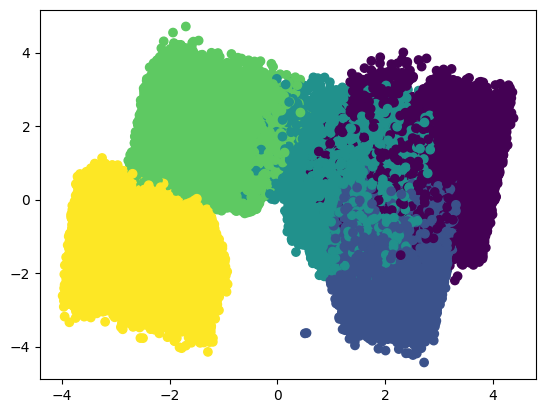

Silhouette Score: 0.07959849123346335


C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

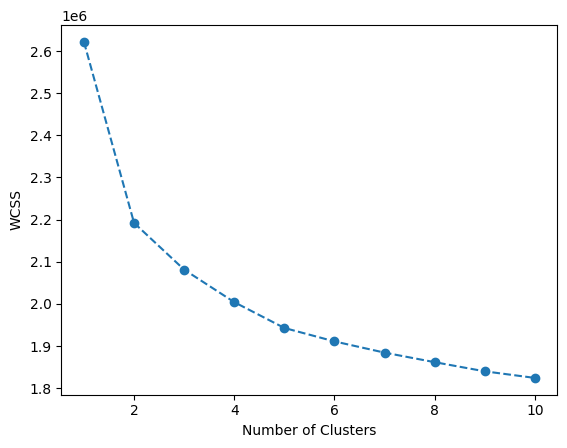

In [77]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 1. Visualize the clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_)
plt.show()

# 2. Silhouette Score
sil_score = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# If using Elbow Method (this is typically before deciding the number of clusters)
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [127]:
def get_user_inputs():
    user_inputs = {}
    user_inputs['Sleep_Duration'] = float(input("Enter your sleep duration (in hours): "))
    user_inputs['Steps'] = int(input("Enter the number of steps you take daily: "))
    user_inputs['Water_Intake'] = float(input("Enter your daily water intake (in liters): "))
    user_inputs['Exercise_Duration'] = float(input("Enter your daily exercise duration (in minutes): "))
    user_inputs['Calories_Intake'] = int(input("Enter your daily calorie intake: "))
    
    return user_inputs


In [128]:
def predict_cluster(user_inputs, kmeans_model):
    # Create a DataFrame from user inputs
    user_df = pd.DataFrame([user_inputs])
    
    # Predict the cluster for the user inputs
    cluster_pred = kmeans_model.predict(user_df)[0]
    
    return cluster_pred


In [129]:
def provide_recommendations(user_inputs, kmeans_model, feature_importance):
    cluster_pred = predict_cluster(user_inputs, kmeans_model)
    
    top_features = get_top_features(cluster_pred, n=5, feature_importance=feature_importance)
    
    recommendations = []
    
    if 'Sleep_Duration' in top_features:
        if user_inputs['Sleep_Duration'] < general_population_mean['Sleep_Duration']:
            recommendations.append("- Consider increasing your sleep duration for better health.")
        elif user_inputs['Sleep_Duration'] > general_population_mean['Sleep_Duration'] + 3:
            recommendations.append("- You might be oversleeping. Consider consulting a specialist.")
    
    # Add recommendations for other top features
    
    return recommendations


In [140]:
selected_columns = ['Sleep_Duration', 'Steps', 'Water_Intake', 'Heart_Rate', 'Calories_Intake','cluster']
df_selected = df[selected_columns]


In [141]:
from sklearn.cluster import KMeans

# Assuming your data after preprocessing is in a DataFrame named 'data'
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df)

cluster_summary = df_selected.groupby('cluster').mean()

C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [142]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Select the relevant columns from your DataFrame
selected_features = df[['Sleep_Duration', 'Steps', 'Water_Intake', 'Heart_Rate', 'Calories_Intake']]

# Define the number of clusters you want
k = 5  # You can adjust this number

# Create a KMeans model and fit it to your selected features
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(selected_features)

# Add the cluster labels to your original DataFrame
df['Cluster'] = clusters

# Now, you can analyze the clusters and provide recommendations just like before
cluster_summary = df.groupby('Cluster').mean()
general_population_mean = df.mean()

# Provide recommendations for each cluster based on the selected features
for cluster_num in cluster_summary.index:
    print(f"Recommendations for Cluster {cluster_num}:")
    
    # Sleep Recommendations:
    if cluster_summary.loc[cluster_num, 'Sleep_Duration'] < general_population_mean['Sleep_Duration']:
        print("- Consider increasing your sleep duration for better health.")
    elif cluster_summary.loc[cluster_num, 'Sleep_Duration'] > general_population_mean['Sleep_Duration'] + 3:
        print("- You might be oversleeping. Consider consulting a specialist.")
    
    # Activity Recommendations:
    if cluster_summary.loc[cluster_num, 'Steps'] < general_population_mean['Steps']:
        print("- Aim for more steps each day for better cardiovascular health.")
    
    # Nutrition Recommendations:
    if cluster_summary.loc[cluster_num, 'Water_Intake'] < general_population_mean['Water_Intake']:
        print("- Increase your daily water intake.")
    
    # Heart Rate Recommendations:
    if cluster_summary.loc[cluster_num, 'Heart_Rate'] > 90:
        print("- Your resting heart rate is on the higher side. Regular check-ups and monitoring are recommended.")
    
    # Calorie Intake Recommendations:
    if cluster_summary.loc[cluster_num, 'Calories_Intake'] > 2500:
        print("- Monitor your calorie intake. Consider a balanced diet.")
    elif cluster_summary.loc[cluster_num, 'Calories_Intake'] < 1800:
        print("- Your calorie intake seems low. Make sure you're getting enough nutrients.")
    
    print("\n")


C:\Users\Manideep Reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Recommendations for Cluster 0:
- Consider increasing your sleep duration for better health.
- Your calorie intake seems low. Make sure you're getting enough nutrients.


Recommendations for Cluster 1:
- Aim for more steps each day for better cardiovascular health.
- Your calorie intake seems low. Make sure you're getting enough nutrients.


Recommendations for Cluster 2:
- Aim for more steps each day for better cardiovascular health.
- Increase your daily water intake.
- Your calorie intake seems low. Make sure you're getting enough nutrients.


Recommendations for Cluster 3:
- Increase your daily water intake.
- Your calorie intake seems low. Make sure you're getting enough nutrients.


Recommendations for Cluster 4:
- Consider increasing your sleep duration for better health.
- Aim for more steps each day for better cardiovascular health.
- Increase your daily water intake.
- Your calorie intake seems low. Make sure you're getting enough nutrients.




In [143]:
def provide_recommendations_for_input(df_selected):
    # Assuming input_data is a DataFrame with the same columns as your original data
    cluster_assigned = kmeans.predict(df_selected)
    cluster = cluster_assigned[0]  # Because we're predicting for one entry

    recommendations = []

    # Sleep Recommendations:
    if cluster_summary.loc[cluster, 'Sleep_Duration'] < general_population_mean['Sleep_Duration']:
        recommendations.append("Consider increasing your sleep duration for better health.")
    elif cluster_summary.loc[cluster, 'Sleep_Duration'] > general_population_mean['Sleep_Duration'] + 3:
        recommendations.append("You might be oversleeping. Consider consulting a specialist.")
    
    # Activity Recommendations:
    if cluster_summary.loc[cluster, 'Steps'] < general_population_mean['Steps']:
        recommendations.append("Aim for more steps each day for better cardiovascular health.")
    
    # Nutrition Recommendations:
    if cluster_summary.loc[cluster, 'Water_Intake'] < general_population_mean['Water_Intake']:
        recommendations.append("Increase your daily water intake.")
    
    # Heart Rate Recommendations:
    if cluster_summary.loc[cluster, 'Heart_Rate'] > 90:
        recommendations.append("Your resting heart rate is on the higher side. Regular check-ups and monitoring are recommended.")
    
    # Calorie Intake Recommendations:
    if cluster_summary.loc[cluster, 'Calories_Intake'] > 2500:
        recommendations.append("Monitor your calorie intake. Consider a balanced diet.")
    elif cluster_summary.loc[cluster, 'Calories_Intake'] < 1800:
        recommendations.append("Your calorie intake seems low. Make sure you're getting enough nutrients.")
    
    return recommendations


In [144]:
import pandas as pd

new_data = {
    'Sleep_Duration': [7],   # Let's assume a person gets 7 hours of sleep
    'Steps': [5000],         # Takes 5000 steps
    'Water_Intake': [1000],  # Drinks 1000ml of water
    'Heart_Rate': [80],      # Has a resting heart rate of 80
    'Calories_Intake': [2300]# Consumes 2300 calories
}

new_df = pd.DataFrame(new_data)

recommendations_for_new_data = provide_recommendations_for_input(new_df)

print("Recommendations based on your input:")
for rec in recommendations_for_new_data:
    print(rec)


Recommendations based on your input:
Consider increasing your sleep duration for better health.
Your calorie intake seems low. Make sure you're getting enough nutrients.


In [146]:
import pandas as pd

def get_user_input():
    # Get user input for each feature
    print("Please provide your health metrics:")

    sleep_duration = float(input("Enter your average sleep duration (in hours): "))
    steps = int(input("Enter your daily steps: "))
    water_intake = float(input("Enter your daily water intake (in ml): "))
    heart_rate = int(input("Enter your resting heart rate (bpm): "))
    calories_intake = int(input("Enter your daily calorie intake: "))

    # Create a DataFrame with the provided data
    data = {
        'Sleep_Duration': [sleep_duration],
        'Steps': [steps],
        'Water_Intake': [water_intake],
        'Heart_Rate': [heart_rate],
        'Calories_Intake': [calories_intake]
    }
    return pd.DataFrame(data)

def provide_recommendations_for_input(input_data):
    # Assuming input_data is a DataFrame with the same columns as your original data
    cluster_assigned = kmeans.predict(input_data)
    cluster = cluster_assigned[0]  # Because we're predicting for one entry

    recommendations = []

    # Sleep Recommendations:
    if cluster_summary.loc[cluster, 'Sleep_Duration'] < general_population_mean['Sleep_Duration']:
        recommendations.append("Consider increasing your sleep duration for better health.")
    elif cluster_summary.loc[cluster, 'Sleep_Duration'] > general_population_mean['Sleep_Duration'] + 3:
        recommendations.append("You might be oversleeping. Consider consulting a specialist.")
    
    # Activity Recommendations:
    if cluster_summary.loc[cluster, 'Steps'] < general_population_mean['Steps']:
        recommendations.append("Aim for more steps each day for better cardiovascular health.")
    
    # Nutrition Recommendations:
    if cluster_summary.loc[cluster, 'Water_Intake'] < general_population_mean['Water_Intake']:
        recommendations.append("Increase your daily water intake.")
    
    # Heart Rate Recommendations:
    if cluster_summary.loc[cluster, 'Heart_Rate'] > 90:
        recommendations.append("Your resting heart rate is on the higher side. Regular check-ups and monitoring are recommended.")
    
    # Calorie Intake Recommendations:
    if cluster_summary.loc[cluster, 'Calories_Intake'] > 2500:
        recommendations.append("Monitor your calorie intake. Consider a balanced diet.")
    elif cluster_summary.loc[cluster, 'Calories_Intake'] < 1800:
        recommendations.append("Your calorie intake seems low. Make sure you're getting enough nutrients.")
    
    return recommendations

user_data = get_user_input()
recommendations = provide_recommendations_for_input(user_data)

print("\nRecommendations based on your input:")
for rec in recommendations:
    print(rec)


Please provide your health metrics:

Recommendations based on your input:
Aim for more steps each day for better cardiovascular health.
Increase your daily water intake.
Your calorie intake seems low. Make sure you're getting enough nutrients.


In [147]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd

# Create the main window
root = tk.Tk()
root.title("Health Recommendation System")

# Create and place labels, entry widgets, and a button
labels = ["Sleep Duration (hours)", "Daily Steps", "Water Intake (ml)", "Resting Heart Rate (bpm)", "Daily Calorie Intake"]
entries = {}

for idx, label_text in enumerate(labels):
    label = tk.Label(root, text=label_text)
    entry = tk.Entry(root)
    
    label.grid(row=idx, column=0, padx=5, pady=5, sticky=tk.W)
    entry.grid(row=idx, column=1, padx=5, pady=5)
    
    entries[label_text] = entry

def get_recommendations():
    data = {
        'Sleep_Duration': [float(entries["Sleep Duration (hours)"].get())],
        'Steps': [int(entries["Daily Steps"].get())],
        'Water_Intake': [float(entries["Water Intake (ml)"].get())],
        'Heart_Rate': [int(entries["Resting Heart Rate (bpm)"].get())],
        'Calories_Intake': [int(entries["Daily Calorie Intake"].get())]
    }
    
    input_data = pd.DataFrame(data)
    recommendations = provide_recommendations_for_input(input_data)
    
    message = "\n".join(recommendations)
    messagebox.showinfo("Recommendations", message)

# Button to generate recommendations
btn_get_recommendations = tk.Button(root, text="Get Recommendations", command=get_recommendations)
btn_get_recommendations.grid(row=len(labels), column=0, columnspan=2, pady=10)

root.mainloop()


In [152]:
import tkinter as tk
from tkinter import messagebox, Toplevel
import pandas as pd

# Create the main window
root = tk.Tk()
root.title("Health Recommendation System")

# Create and place labels, entry widgets, and a button
labels = ["Sleep Duration (hours)", "Daily Steps", "Water Intake (ml)", "Resting Heart Rate (bpm)", "Daily Calorie Intake"]
entries = {}

for idx, label_text in enumerate(labels):
    label = tk.Label(root, text=label_text)
    entry = tk.Entry(root)
    
    label.grid(row=idx, column=0, padx=5, pady=5, sticky=tk.W)
    entry.grid(row=idx, column=1, padx=5, pady=5)
    
    entries[label_text] = entry

def show_recommendations(recommendations):
    rec_window = Toplevel(root)
    rec_window.title("Recommendations")
    
    tk.Label(rec_window, text="Recommendations based on your input:", font=("Arial", 16)).pack(pady=10)
    
    for idx, rec in enumerate(recommendations, 1):
        tk.Label(rec_window, text=f"{idx}. {rec}", wraplength=400).pack(pady=5, padx=10, anchor=tk.W)

def get_recommendations():
    data = {
        'Sleep_Duration': [float(entries["Sleep Duration (hours)"].get())],
        'Steps': [int(entries["Daily Steps"].get())],
        'Water_Intake': [float(entries["Water Intake (ml)"].get())],
        'Heart_Rate': [int(entries["Resting Heart Rate (bpm)"].get())],
        'Calories_Intake': [int(entries["Daily Calorie Intake"].get())]
    }
    
    input_data = pd.DataFrame(data)
    recommendations = provide_recommendations_for_input(input_data)
    
    show_recommendations(recommendations)

# Button to generate recommendations
btn_get_recommendations = tk.Button(root, text="Get Recommendations", command=get_recommendations)
btn_get_recommendations.grid(row=len(labels), column=0, columnspan=2, pady=10)

root.mainloop()
